# **使用KERAS中的DNN和CNN進行手寫辨識，MNIST資料分析**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 15s 7ms/step - loss: 0.2823 - accuracy: 0.9181 - val_loss: 0.1399 - val_accuracy: 0.9591
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1157 - accuracy: 0.9654 - val_loss: 0.0937 - val_accuracy: 0.9727
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0785 - accuracy: 0.9757 - val_loss: 0.0976 - val_accuracy: 0.9695
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0597 - accuracy: 0.9815 - val_loss: 0.0946 - val_accuracy: 0.9731
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0902 - val_accuracy: 0.9733
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0853 - val_accuracy: 0.9754
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0304 -

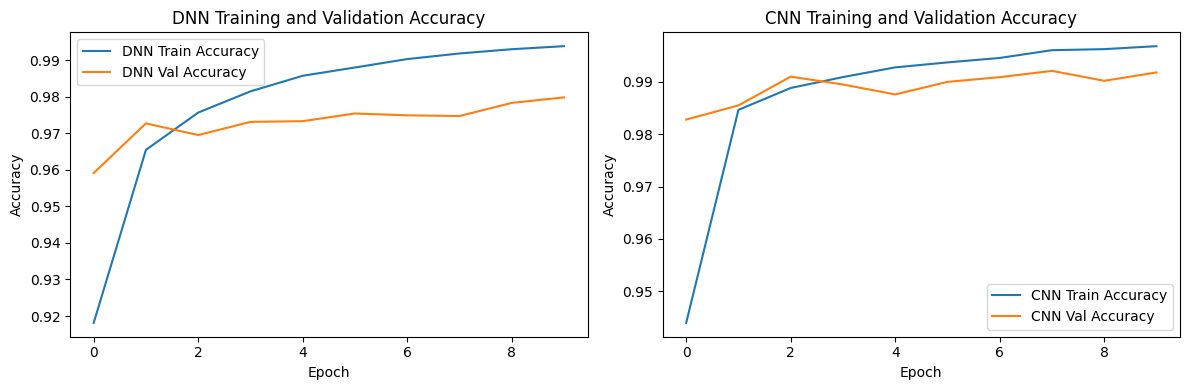

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# 載入並預處理MNIST資料集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 建立DNN模型
dnn_model = Sequential()
dnn_model.add(Flatten(input_shape=(28, 28, 1)))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(10, activation='softmax'))

dnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 訓練DNN模型
dnn_history = dnn_model.fit(train_images, train_labels, epochs=10, batch_size=64,
                            validation_data=(test_images, test_labels))

# 建立CNN模型
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 訓練CNN模型
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64,
                            validation_data=(test_images, test_labels))

# 繪製準確度曲線
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['accuracy'], label='DNN Train Accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='DNN Val Accuracy')
plt.title('DNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


手寫辨識系統，可進行辨識並給予辨識結果。

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.models import load_model
from PIL import Image

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据预处理
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 创建CNN模型
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# 评估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# 保存模型
model.save('mnist_model.h5')

# 加载模型并进行数字识别
loaded_model = load_model('mnist_model.h5')




Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1625 - accuracy: 0.9521 - val_loss: 0.0499 - val_accuracy: 0.9842
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0395 - val_accuracy: 0.9871
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0341 - val_accuracy: 0.9892
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0311 - accuracy: 0.9905
Test Accuracy: 99.05%


In [15]:
# 加载测试图像（请确保替换为您的图像文件路径）
test_image_path = '/content/drive/MyDrive/大學/轉接/TEST_MINST_WRITING.jpg'
test_image = Image.open(test_image_path).convert('L')
test_image = np.array(test_image.resize((28, 28))) / 255.0
test_image = test_image.reshape(1, 28, 28, 1)

# 进行数字识别
prediction = loaded_model.predict(test_image)
print(prediction)
predicted_digit = np.argmax(prediction)

# 打印识别结果
print(f'Predicted Digit: {predicted_digit}')

1/1 [==============================] - 0s 62ms/step
[[0.4264391  0.00640333 0.22771771 0.00379384 0.07205769 0.01603802
  0.10695084 0.02394181 0.08755419 0.0291034 ]]
Predicted Digit: 0
